## IT461 : Practical Machine Learning 

###  **Assignment 1:** Linear and Logistic Regression

- **6 points**
- **Due Tuesday, Jan 3, 02:00 pm**

### **Name:**  Hutoon Suliman Alomran
###**ID:**   441200858

### **Instructions**
- Type in your name and ID at the begnning of the notebook.
- Fill out sections of the code marked `"YOUR CODE HERE"`.
- Add **comments** to explain your code.
- Add **text** to explain your results.
- Once you've filled out your solutions, share the notebook with this 'IT461ML@gmail.com' and print the notebook as *pdf* and submit the file to LMS(make sure that the output is displayed).





In [181]:
# Importing Libraries
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Assignment1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Assignment1


## **Question 1: Linear Regression (3 points)**

In this section, you will build and evaluate a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. 

### **Multiple linear regression for sales prediction**

The `advertising.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. 
The sales are in thousands of units and the budget is in thousands of dollars.  

The goal is to predict the sales of the product given the TV, radio, and newspaper ad budgets using a linear regression model.

### Load the dataset


In [182]:
df = pd.read_csv('advertising.csv',header=0)

###  Normalize the features in the dataset.






In [183]:
# get the dimensions of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# get the features and target attribute
features = df.drop("Sales", axis=1)
target = df["Sales"]

print('features: ', df.columns[:3])
print('target:', target.name)

# normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

Number of rows: 200
Number of columns: 4
features:  Index(['TV', 'Radio', 'Newspaper'], dtype='object')
target: Sales


### Split the data into train and test set.

In [184]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2)

### Build the model using *LinearRegression*

> Indented block



In [185]:
from sklearn.linear_model import LinearRegression

# build the model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# print the model parameters
print("Intercept:", LRmodel.intercept_, "  Coefficients:", LRmodel.coef_)

# print the model equation
print("y = ", LRmodel.intercept_, "+", LRmodel.coef_[0], "* TV +", LRmodel.coef_[1], "* radio +", LRmodel.coef_[2], "* newspaper")

Intercept: 15.160806863006194   Coefficients: [ 4.49915792  1.66698863 -0.11806976]
y =  15.160806863006194 + 4.499157915381573 * TV + 1.6669886270735645 * radio + -0.11806976225523694 * newspaper


### Build the model using *SGDRegressor*

In [186]:
from sklearn.linear_model import SGDRegressor

# build the model
SGDmodel = SGDRegressor(max_iter=1000)
SGDmodel.fit(X_train, y_train)

# print the model parameters
print()
print("Intercept:",  SGDmodel.intercept_, "   Coefficients:",  SGDmodel.coef_)

# print the model equation
print("y = ",  SGDmodel.intercept_, "+",  SGDmodel.coef_[0], "* TV +",  SGDmodel.coef_[1], "* radio +",  SGDmodel.coef_[2], "* newspaper")


Intercept: [15.14259232]    Coefficients: [ 4.498079    1.63276675 -0.08938957]
y =  [15.14259232] + 4.498079001275071 * TV + 1.6327667462601385 * radio + -0.08938957477286077 * newspaper


### Models evaluation and comparisons


In [187]:
from sklearn.metrics import mean_squared_error, r2_score

print('Linear Regression: ')
# Make predictions on the training data
y_train_pred = LRmodel.predict(X_train)

# Calculate the MSE and R2 scores on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Print the training MSE and R2 scores
print('Training MSE:', mse_train)
print('Training R2: ' , r2_train)

# Make predictions on the test data
y_test_pred = LRmodel.predict(X_test)

# Calculate the MSE and R2 scores on the test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the test MSE and R2 scores
print('Test MSE: ', mse_test)
print('Test R2: ', r2_test)



# __________________________________________________________________________

print('\nSGDRegressor: ')

# Make predictions on the training data
y_train_pred = SGDmodel.predict(X_train)

# Calculate the MSE and R2 scores on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


# Print the training MSE and R2 scores
print('Training MSE:', mse_train)
print('Training R2: ' , r2_train)

# Make predictions on the test data
y_test_pred = SGDmodel.predict(X_test)

# Calculate the MSE and R2 scores on the test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the test MSE and R2 scores
print('Test MSE: ', mse_test)
print('Test R2: ', r2_test)

Linear Regression: 
Training MSE: 2.415886718406572
Training R2:  0.9009334314806108
Test MSE:  4.084965219708217
Test R2:  0.8996327819764195

SGDRegressor: 
Training MSE: 2.4173612709058836
Training R2:  0.9008729655427439
Test MSE:  4.043331809010615
Test R2:  0.9006557110305988


---
The performance of the two models is quite similar, as indicated by the relatively high values of R2 for both models on both the training and test sets. The mean squared error (MSE) for the two models is also similar, with the SGDRegressor model performed slightly better than the linear regression model on the test set. The SGDRegressor model had a lower mean squared error (MSE) and a slightly higher R2 score compared to the linear regression model.

Overall, it appears that both models performed well, with **the** SGDRegressor model slightly outperforming the linear regression model.

---




## **Question 2: Logistic Regression (3 points)**

In this section, you'll build and evaluate a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. 

### **Multiple logistic regression to identify forged banknotes.**

The `banknote_authentication.csv` dataset has been created from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.  

The goal is to identify forged banknotes using logistic regression model that can  distinguish between genuine and forged banknotes given features extarcted from their images.

### Load the dataset


In [195]:
import pandas as pd

# Load the dataset
df = pd.read_csv('banknote_authentication.csv')

# get the dimensions of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Print the names of the features
print('features: ', df.columns[:4])

# Print the name of the class attribute
print('target: ', df['class'].name)

Number of rows: 1372
Number of columns: 5
features:  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')
target:  class


### Normalize the features.

In [196]:
from sklearn.preprocessing import MinMaxScaler

# Select only the features from the dataset
X = df.drop(columns=['class'])

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into train and test set.

In [200]:
from sklearn.model_selection import train_test_split

# Split the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['class'], test_size=0.2)

### Build the model.

In [201]:
from sklearn.linear_model import LogisticRegression

# Build the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation on training and test set.


------------- Testing data ------------
Accuracy: 0.97
Precision: 0.94
Recall: 1.00
[[159   7]
 [  0 109]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


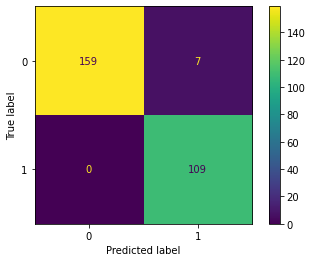

------------- Training data -----------
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
[[580  16]
 [  2 499]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


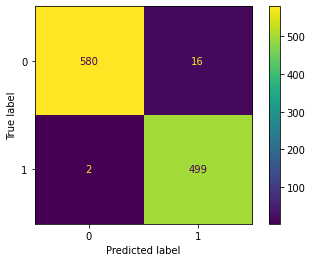

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the scores

print("------------- Testing data ------------")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)
plt.show()


# Make predictions on the training set
y_pred = model.predict(X_train)

# Calculate the accuracy, precision, and recall scores
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

# Print the scores
print("------------- Training data -----------")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print(confusion_matrix(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(model, X_train, y_train)
plt.show()

On Testing data

*   The accuracy of the model is 0.97, which means that the model was able to correctly predict the class for 97% of the test data.
*   The precision of 0.94 means that, when the model predicts positive class, it is correct 94% of the time.

*   Recall is a measure of the model's ability to find all instances of the positive class (in this case, class 1).



---

On Training data


*   The accuracy of the model is 0.98, which means that the model was able to correctly predict the class for 98% of the traininge data.

*   The precision of 0.97 means that, when the model predicts positive class, it is correct 97% of the time.
*   Recall is a measure of the model's ability to find all instances of the positive class (in this case, class 1).



###Try different classification threshold.

In [203]:
import numpy as np

# Get the predicted probabilities of each sample
y_probs = model.predict_proba(X_test)[:, 1]

# Set the classification thresholds
thresholds = [0.1, 0.4, 0.9]

# Make predictions at each threshold
for threshold in thresholds:
    y_pred = np.where(y_probs > threshold, 1, 0)
    print("--------------------------------------------")
    print(f'Threshold: {threshold}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')

--------------------------------------------
Threshold: 0.1
Accuracy: 0.93
Precision: 0.85
Recall: 1.00
--------------------------------------------
Threshold: 0.4
Accuracy: 0.97
Precision: 0.93
Recall: 1.00
--------------------------------------------
Threshold: 0.9
Accuracy: 0.96
Precision: 1.00
Recall: 0.90


On the testing data, the model performs best when the threshold is set to 0.4, as this results in the highest accuracy and precision. However, at a threshold of 0.9, the model has a lower accuracy but a higher precision. 

### `Find the optimal classification threshold`





In [204]:
# Import the necessary modules
import numpy as np
from sklearn.metrics import f1_score

# Get the predicted probabilities of each sample
y_probs = model.predict_proba(X_train)[:, 1]

# Initialize a list to store the F1 scores
f1_scores = []

# Iterate over a range of thresholds
for t in np.arange(0, 1.01, 0.01):
  # Make predictions using the current threshold
  y_pred = np.where(y_probs > t, 1, 0)
  
  # Calculate the F1 score
  f1 = f1_score(y_train, y_pred)
  
  # Append the F1 score to the list
  f1_scores.append(f1)

# Find the optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = np.arange(0, 1.01, 0.01)[optimal_idx]
print(f' Find the optimal classification threshold for the training dataset based on F-score: {optimal_threshold:.2f}')

 Find the optimal classification threshold for the training dataset based on F-score: 0.73


---
The optimal threshold for training data is 0.73, it means that this is the threshold that gives the best performance on the training data.

---